# Movie Data Analysis for Microsoft
<img src="./images/Microsoft_image.jpg" alt="Drawing" style="width: 900px;height:300px;float: left;"/>

# Overview
This project uses exploratory data analysis to produce insights about what factors lead to a movie's success. Analysis of movie datasets from IMDb and The Numbers shows that production budget, genre, and release date play an important role in determining a movie's gross profit, rating, and return on investment. Microsoft can use this analysis to determine what types of movies to make, how much to invest in them, and when to release them.

# Business Problem
Microsoft is planning on starting their own movie studio, but they are lacking industry knowledge. To guide their decision making in their new studio, they need analysis of what types of movies perform well at the box office.

# Data Understanding
The datasets used in this analysis are from IMDb and The Numbers. They provide movie information such as genre, ratings, and financials.

In [529]:
#import pandas
import pandas as pd

In [530]:
#import data with pandas
imdb_titles = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_titles_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## IMDb Datasets
The IMDb datasets contain unique IDs for each movie, and include information on movies released from 2010 and after. IMDb provides information on region of production, genre, and ratings.

In [531]:
imdb_titles.head(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [532]:
imdb_titles.region.value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
EH         1
MQ         1
CF         1
AI         1
KN         1
Name: region, Length: 213, dtype: int64

In [533]:
imdb_titles_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [534]:
imdb_titles_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [535]:
imdb_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [536]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## The Numbers Dataset
The Numbers dataset provides information on movie finances and release dates. The dataset includes movies between the year 1915 and 2020.

In [537]:
the_numbers.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [538]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

## Data Cleaning

For each dataset I drop unnecessary columns and rows, and I manipulate the data to desired forms.

In [539]:
#select only US films
imdb_titles = imdb_titles[imdb_titles.region == 'US']

#drop duplicate rows
imdb_titles.drop_duplicates('title_id', inplace=True)

#drop unecessary columns
imdb_titles.drop(['ordering', 'title', 'language', 'types', 'attributes', 
                  'is_original_title'], axis=1, inplace=True)


In [540]:
# #drop unecessary columns
imdb_titles_basics.drop(['original_title', 'runtime_minutes'], axis=1, inplace=True)

#rename columns for consistency
imdb_titles_basics.rename(columns={'primary_title': 'movie'}, 
                          inplace=True)

#drop row where genre is NaN
imdb_titles_basics.dropna(subset=['genres'], inplace=True)

#convert string of genres into list of strings
imdb_titles_basics['genres'] = imdb_titles_basics.genres.map(lambda x: x.split(","))

In [541]:
imdb_ratings.drop('numvotes', axis=1, inplace=True)

In [542]:
#convert budget and gross columsn from strings to floats
the_numbers['domestic_gross'] = the_numbers.domestic_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
the_numbers['production_budget'] = the_numbers.production_budget.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
the_numbers['worldwide_gross'] = the_numbers.worldwide_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))

#seperate release date into year and month
the_numbers['start_year'] = the_numbers.release_date.map(lambda x: int(x[-4:]))
the_numbers['start_month'] = the_numbers.release_date.map(lambda x: x[:3])

#convert year to int to match imdb dataset
the_numbers['start_year'] = the_numbers['start_year'].map(lambda x: int(x))

#drop unecessary columns
the_numbers.drop(['id', 'release_date'], axis=1, inplace=True)

## Merge Data
I start by merging imdb datasets through their unique IDs(title_id/tconst).

In [543]:
#reset the imdb_title_baiscs to tconst
imdb_titles_basics.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [544]:
#join imbd_titles with imdb_tiles_basics
imdb_titles_and_basics = imdb_titles.join(imdb_titles_basics, how='inner', 
                                          on='title_id')

In [545]:
#merge imbd_ratings with the joined dataframe above
imdb_combined = imdb_titles_and_basics.join(imdb_ratings, how='left', 
                                          on='title_id')

In [546]:
imdb_combined.head()

,title_id,region,movie,start_year,genres,averagerating
12,tt0369610,US,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",7.0
50,tt0401729,US,John Carter,2012,"[Action, Adventure, Sci-Fi]",6.6
109,tt1014759,US,Alice in Wonderland,2010,"[Adventure, Family, Fantasy]",6.5
152,tt10379338,US,Random Night Out,2019,[Comedy],NaN
157,tt10446418,US,Icon,2011,"[Documentary, History]",NaN


Now I merge the combined imdb dataset with the tn_budgets. Since these datasets don't have a common identifier, I merge them using the movie title and release year. The merged dataset will contain movies between 2010 and 2020.

In [547]:
movie_df = imdb_combined.merge(the_numbers, how='inner', 
                               left_on= ['movie', 'start_year'],
                              right_on= ['movie', 'start_year'])

In [548]:
movie_df.movie.value_counts()

Redemption                            3
Addicted                              2
Heist                                 2
Stronger                              2
The Night Before                      2
                                     ..
Aroused                               1
Real Steel                            1
It                                    1
Velvet Buzzsaw                        1
Captain America: The First Avenger    1
Name: movie, Length: 1323, dtype: int64

Some of the movie in our datasets have the same movie title and year despite being different movies. Because we are joining the tn_budgets dataset with the imdb data through movie title and year, any movie/year combo that has multiple occurrences will be given the same values from the tn_budgets dataset. There are only 33 of these occurrences, so I remove any such rows.

In [549]:
movie_df.drop_duplicates(subset='movie', keep=False, inplace=True)

## Feature Engineering
Using the production budget and gross profit columns, I create a new column for return on investment (ROI) to assess the efficiency of each movie investment. ROI is calculated by dividing the net return on investment by the cost of such investment.

In [550]:
#add column for return on investment in perecentage
movie_df['ROI'] = ((movie_df.worldwide_gross - movie_df.production_budget) 
                   / movie_df.production_budget) *100

movie_df['rating_category'] = movie_df.averagerating.map(lambda x: 
                                                   "Bad" if x < 4 else 
                                                    ("Average" if x < 7 else 
                                                     "Good"))

# Analysis

In [551]:
#import plotting library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

## Production Budget
Production budget is positively correlated with gross profits and ratings.

In [552]:
#production budget correlation with gross profit and ROI
budget_gross_corr = movie_df.production_budget.corr(movie_df.worldwide_gross)
print("Production Budget Correlation with Gross Profit: ", budget_gross_corr)

budget_rating_corr = movie_df.production_budget.corr(movie_df.averagerating)
print("Production Budget Correlation with Ratings: ", budget_rating_corr)

Production Budget Correlation with Gross Profit:  0.7799755853475726
Production Budget Correlation with Ratings:  0.24356721920729124


In [553]:
#define function for format of gross profit y-axis ticks
def gross_tick_format(x, pos):
    new_format = '{}'.format(x / 1000000000)
    return new_format

In [554]:
#define function for format of budget x-axis ticks
def budget_tick_format(x, pos):
    new_format = '{}'.format(x / 1000000)
    return new_format

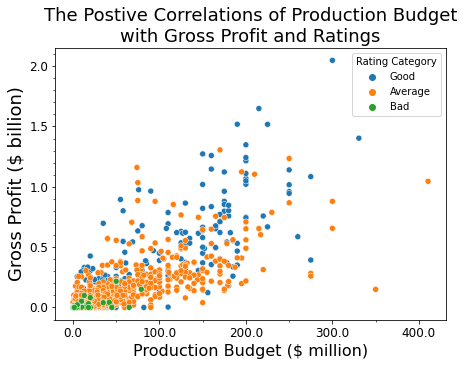

In [555]:
bad_movies =  movie_df[movie_df.rating_category == "Bad"]
average_movies =  movie_df[movie_df.rating_category == "Average"]
good_movies =  movie_df[movie_df.rating_category == "Good"]

sorted_by_rating = pd.concat([good_movies, average_movies, bad_movies])

fig, ax1 = plt.subplots(figsize=(7,5))

sns.scatterplot(ax=ax1, x='production_budget', y='worldwide_gross', 
                hue='rating_category', hue_order=['Good','Average','Bad'],
                data=sorted_by_rating);

ax1.set_title("""The Postive Correlations of Production Budget
with Gross Profit and Ratings""", fontsize=18)

ax1.get_legend().set_title("Rating Category")
ax1.set_xlabel('Production Budget ($ million)', fontsize=16);
ax1.set_ylabel('Gross Profit ($ billion)', fontsize=18);

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(gross_tick_format))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(budget_tick_format))
ax1.tick_params(axis='both', which='major', labelsize=12)

ax1.yaxis.set_major_locator(ticker.MultipleLocator(500000000))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(100000000))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(100000000))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(50000000))

## Genre
Animation, sci-fi, and adventure genres produce the greatest gross profit on average. Mystery and horror movies provide the best return on investment.

In [556]:
#seperate the list of genres in each row into their own rows
genres_movie_df = movie_df.explode('genres')

In [460]:
#group the data by genre, take the mean of the columns, and sort by gross
genres_grouped = genres_movie_df.groupby('genres').mean().sort_values(
    by='worldwide_gross', ascending=True)

In [557]:
#define function for format of gross profit x-axis ticks
def gross_tick_format_2(x, pos):
    new_format = '{}'.format(x / 1000000)
    return new_format

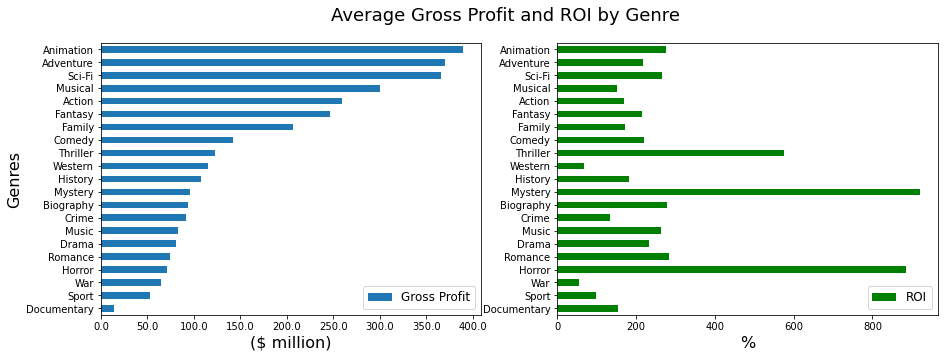

In [558]:
#plot a bar charts of avergae gross and ROI by genre
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

#set title for overall figure
fig.suptitle("Average Gross Profit and ROI by Genre", fontsize=18)

#gross porfit bar chart
genres_grouped.plot(ax=ax1, kind='barh', y=['worldwide_gross']);

#ROI bar chart
genres_grouped.plot(ax=ax2, kind='barh', y=['ROI'], color='g');

#adjust labels and legends
ax1.legend(['Gross Profit'], loc=4, fontsize=12);
ax1.set_ylabel('Genres', fontsize=16);
ax1.set_xlabel('($ million)', fontsize=16);
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(gross_tick_format_2))

ax2.legend(['ROI'], loc=4, fontsize=12);
ax2.set_ylabel("");
ax2.set_xlabel("%", fontsize=16);

## Release Month
The summer months from May to July and the holiday months from November to December have seen the greatest sum of profits in the last decade.

In [559]:
#group data by month and calculate the sum of the columns
month_grouped = movie_df.groupby('start_month').sum()

In [560]:
month_grouped

,start_year,averagerating,production_budget,domestic_gross,worldwide_gross,ROI
start_month,,,,,,
Apr,159084,487.9,3.584700e+09,5.381209e+09,1.419995e+10,19120.898668
Aug,221502,676.6,4.085870e+09,5.169591e+09,1.113349e+10,25208.067397
Dec,326234,989.3,6.656300e+09,8.800148e+09,2.162514e+10,25702.435973
Feb,173236,501.0,3.856140e+09,5.585865e+09,1.228548e+10,23853.337738
Jan,118827,332.0,1.878827e+09,2.196457e+09,4.219489e+09,26171.636346
Jul,213465,661.6,6.486255e+09,8.538119e+09,2.269723e+10,78454.102588
Jun,217533,682.2,7.727392e+09,1.071311e+10,2.736172e+10,31367.357922
Mar,229631,706.7,6.425540e+09,7.587076e+09,1.805564e+10,21021.108972
May,187325,579.7,7.549950e+09,8.946993e+09,2.405226e+10,21606.982419


I reorder the months so that they are in the correct chronological order.

In [561]:
#make start_month its own column by reseting the index
month_grouped.reset_index(inplace=True)

In [562]:
#set new month order
order = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]

#set index to the specified order and sort
month_grouped.index = order
month_grouped.sort_index(inplace=True)

In [563]:
#set the index back to start_month
month_grouped.set_index('start_month', inplace=True)

In [564]:
#define function for format of gross profit y-axis ticks
def gross_tick_format_3(x, pos):
    new_format = '{}'.format(x / 10000000000)
    return new_format

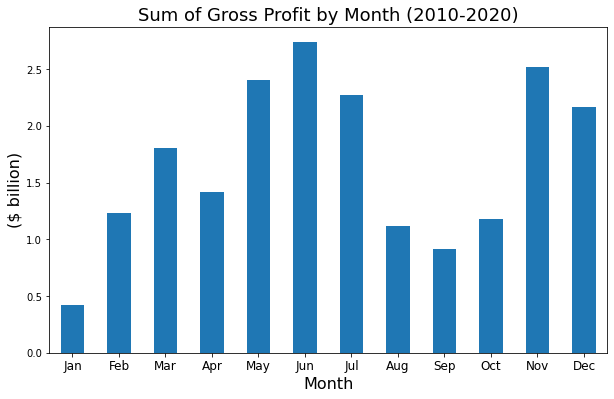

In [565]:
#plot bar chart of sum of gross profit by month
ax = month_grouped.plot(kind='bar', y=['worldwide_gross'], figsize=(10,6));

#remove legend and adjust title/labels/ticks
ax.set_title('Sum of Gross Profit by Month (2010-2020)', fontsize=18);
ax.get_legend().remove()
ax.set_xlabel('Month', fontsize=16);
ax.set_ylabel('($ billion)', fontsize=16);
ax.yaxis.set_major_formatter(ticker.FuncFormatter(gross_tick_format_3))

plt.xticks(fontsize=12, rotation=0);

## Conclusions
 - **Invest in large budget movies in the animation, sci-fi, and adventure genres:** Larger budget movies produce higher profits and ratings. Animation, sci-fi, and adventure genres perform better than average in terms of gross profits.
 - **Fill out movie collection with lower budget mystery and horror films:** In addition to big budget movies, Microsoft will need to fill out its movie portfolio. Lower budget mystery and horror movies offer a great opportunity to do this as they can generate a substantial return on investment.
 - **Release new movies during the summer and holiday months:** May through July and November through December are the prime months for releasing new movies as people are taking time off for the summer and holidays.

## Next Steps
 - **Determine other factors impact ratings:** Most of this analysis focused on movie features that primarily effected profits. Future modeling should identifier factors that effect movie rating.
 - **Explore the impact of cast and crew on movie success:** This analysis could identify which cast and crew positions (e.g. directors, actors, writers) are most crucial to the the success of a movie.
 - **Analyze the influence that streaming platforms have had on box office returns:** In recent years, streaming platforms have become more prevalent. Looking at the overall trend of box office gross profits could lend insight into the impact streaming has had on the movie industry.